#### Imports

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Global variables

In [2]:
# The diameter (m) of the pneumatic cylinder.
d_25 = 25 / 1000
# The radius (m) of the pneumatic cylinder.
r_25 = d_25/2
# The surface area (m^2) of the pneumatic cylinder.
area = math.pi*r_25**2

# The diameter (m) of the pneumatic cylinder for the X-ring and corresponding O-ring.
d_257 = 25.7 / 1000
# The radius (m) of the pneumatic cylinder for the X-ring and corresponding O-ring.
r_257 = d_257/2
# The surface area (m^2) of the pneumatic cylinder for the X-ring and corresponding O-ring.
large_area = math.pi*r_257**2

# The models with different sealing mechanism used in this test.
rings = ['O-ring','NAPN','NAP310','PK','KDN','O-ring257','X-ring257']
# The models with different cross-sectional shape used in this test.
shapes = ['Circle','Stadium','Kidney','Stadium_lc','Kidney_lc']
# Remove first 15 data points to avoid deviating starting values
drop_amount = 15 

# Friction force test

In [88]:
friction_force = {}

for ring in rings:
    friction_force[ring] = {}
    for bar in [1,3,5,7]:
        ring_df = pd.read_csv(f'./data/friction/{ring}_{bar}bar.csv',delimiter='\s+',header=None,names=(['Time','A','B','C','Laser(mm)','Pressure(bar)','Force(N)']))
        ring_df.drop(columns=['A','B','C'],index=ring_df.index[range(drop_amount)],axis=1,inplace=True)

        friction_force[ring][bar] = {}
        friction_force[ring][bar]['Time'] = ring_df['Time']/1000
        friction_force[ring][bar]['Laser(mm)'] = ring_df['Laser(mm)']
        friction_force[ring][bar]['Pressure(bar)'] = ring_df['Pressure(bar)']/10
        friction_force[ring][bar]['Force(N)'] = ring_df['Force(N)']
        
        # The 25.7mm rings have a different and larger surface area
        if '257' in ring:
            Fp = ring_df['Pressure(bar)'] * 10**5 * large_area
        else:
            Fp = ring_df['Pressure(bar)'] * 10**5 * area
            
        FF = ring_df['Force(N)'] - Fp
        friction_force[ring][bar]['FrictionForce'] = FF      
        friction_force[ring][bar]['FrictionFrom'] = FF[FF>FF.mean()].mean()
        friction_force[ring][bar]['FrictionTo'] = FF[FF<FF.mean()].mean()
        # Defining the friction force range
        friction_force[ring][bar]['FrictionRange'] = friction_force[ring][bar]['FrictionFrom'] - friction_force[ring][bar]['FrictionTo']


for shape in shapes:
    friction_force[shape] = {}
    for bar in [1,2,3,4,5,6,7]:
        if bar > 3 and shape not in ['Stadium_lc','Kidney_lc','Kidney']:
            break
        if bar > 4 and shape not in ['Kidney_lc']:
            break

        shape_df = pd.read_csv(f'./data/friction/{shape}_{bar}bar.csv',delimiter='\s+',header=None,names=(['Time','A','B','C','Laser(mm)','Pressure(bar)','Force(N)']))
        shape_df.drop(columns=['A','B','C'],index=shape_df.index[range(drop_amount)],axis=1,inplace=True)

        friction_force[shape][bar] = {}
        friction_force[shape][bar]['Time'] = shape_df['Time']/1000
        friction_force[shape][bar]['Laser(mm)'] = shape_df['Laser(mm)']
        friction_force[shape][bar]['Pressure(bar)'] = shape_df['Pressure(bar)']/10
        friction_force[shape][bar]['Force(N)'] = shape_df['Force(N)']

        Fp = shape_df['Pressure(bar)'] * 10**5 *area
        FF = shape_df['Force(N)'] - Fp

        friction_force[shape][bar]['FrictionForce'] = FF      
        friction_force[shape][bar]['FrictionFrom'] = FF[FF>FF.mean()].mean()
        friction_force[shape][bar]['FrictionTo'] = FF[FF<FF.mean()].mean()

        # Defining the friction force range
        friction_force[shape][bar]['FrictionRange'] = friction_force[shape][bar]['FrictionFrom'] - friction_force[shape][bar]['FrictionTo']

#### Friction force 1 bar plot

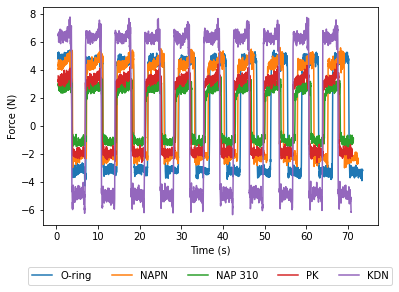

In [50]:
plt.plot(friction_force['O-ring'][1]['Time'],friction_force['O-ring'][1]['FrictionForce'],'tab:blue',label='O-ring')
plt.plot(friction_force['NAPN'][1]['Time'],friction_force['NAPN'][1]['FrictionForce'],'tab:orange',label='NAPN')
plt.plot(friction_force['NAP310'][1]['Time'],friction_force['NAP310'][1]['FrictionForce'],'tab:green',label='NAP 310')
plt.plot(friction_force['PK'][1]['Time'],friction_force['PK'][1]['FrictionForce'],'tab:red',label='PK')
plt.plot(friction_force['KDN'][1]['Time'],friction_force['KDN'][1]['FrictionForce'],'tab:purple',label='KDN')

plt.xlabel('Time (s)')
plt.ylabel('Force (N)')

plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.3),ncol=5)

plt.savefig('./figures/frictionforce_1bar.pdf',bbox_inches = 'tight')



#### Friction force range definement plot

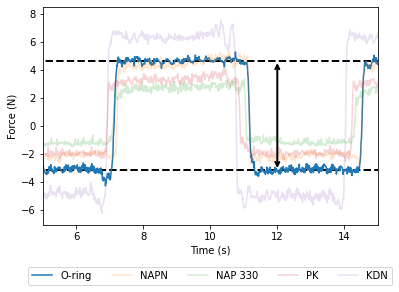

In [5]:
plt.annotate(text='',xy=(12,friction_force['O-ring'][1]['FrictionFrom']), xytext=(12,friction_force['O-ring'][1]['FrictionTo']), arrowprops=dict(arrowstyle='<->', lw=2))
plt.hlines(xmin=0, xmax=70,y=friction_force['O-ring'][1]['FrictionFrom'], linestyles='dashed', colors='0', lw=2)
plt.hlines(xmin=0, xmax=70,y=friction_force['O-ring'][1]['FrictionTo'], linestyles='dashed', colors='0', lw=2)
plt.plot(friction_force['O-ring'][1]['Time'],friction_force['O-ring'][1]['FrictionForce'],'tab:blue',label='O-ring')
plt.plot(friction_force['NAPN'][1]['Time'],friction_force['NAPN'][1]['FrictionForce'],'tab:orange',alpha=0.2,label='NAPN')
plt.plot(friction_force['NAP310'][1]['Time'],friction_force['NAP310'][1]['FrictionForce'],'tab:green',alpha=0.2,label='NAP 330')
plt.plot(friction_force['PK'][1]['Time'],friction_force['PK'][1]['FrictionForce'],'tab:red',alpha=0.2,label='PK')
plt.plot(friction_force['KDN'][1]['Time'],friction_force['KDN'][1]['FrictionForce'],'tab:purple', alpha=0.2,label='KDN')


plt.xlim([5,15])
plt.xlabel('Time (s)')
plt.ylabel('Force (N)')
plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.3),ncol=5)

plt.savefig('./figures/frictionforce_1bar_zoom.pdf',bbox_inches = 'tight')



#### Amplitude friction plot 25mm

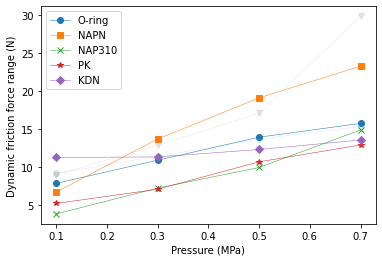

In [6]:
fr = {'Pressure': [.1,.3,.5,.7],
     'O_ring': [friction_force['O-ring'][1]['FrictionRange'],friction_force['O-ring'][3]['FrictionRange'],friction_force['O-ring'][5]['FrictionRange'],friction_force['O-ring'][7]['FrictionRange']],
     'NAPN': [friction_force['NAPN'][1]['FrictionRange'],friction_force['NAPN'][3]['FrictionRange'],friction_force['NAPN'][5]['FrictionRange'],friction_force['NAPN'][7]['FrictionRange']],
     'NAP310': [friction_force['NAP310'][1]['FrictionRange'],friction_force['NAP310'][3]['FrictionRange'],friction_force['NAP310'][5]['FrictionRange'],friction_force['NAP310'][7]['FrictionRange']],
     'PK': [friction_force['PK'][1]['FrictionRange'],friction_force['PK'][3]['FrictionRange'],friction_force['PK'][5]['FrictionRange'],friction_force['PK'][7]['FrictionRange']],
     'KDN': [friction_force['KDN'][1]['FrictionRange'],friction_force['KDN'][3]['FrictionRange'],friction_force['KDN'][5]['FrictionRange'],friction_force['KDN'][7]['FrictionRange']],
     'O_ring257': [friction_force['O-ring257'][1]['FrictionRange'],friction_force['O-ring257'][3]['FrictionRange'],friction_force['O-ring257'][5]['FrictionRange'],friction_force['O-ring257'][7]['FrictionRange']],
     'X_ring257': [friction_force['X-ring257'][1]['FrictionRange'],friction_force['X-ring257'][3]['FrictionRange'],friction_force['X-ring257'][5]['FrictionRange'],friction_force['X-ring257'][7]['FrictionRange']]
    }
frictie_range = pd.DataFrame(data=fr)

plt.plot(frictie_range.Pressure,frictie_range.O_ring257,marker='o',color='tab:blue',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.X_ring257,marker='v',color='tab:brown',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.O_ring,marker='o',color='tab:blue',label='O-ring',linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.NAPN,marker='s',color='tab:orange',label='NAPN',linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.NAP310,marker='x',color='tab:green',label='NAP310',linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.PK,marker='*',color='tab:red',label='PK',linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.KDN,marker='D',color='tab:purple',label='KDN',linewidth=0.5)
plt.xlabel('Pressure (MPa)')
plt.ylabel('Dynamic friction force range (N)')

plt.legend()
plt.savefig('./figures/test_3_results_frictionforcerange_25mm.pdf',bbox_inches = 'tight')



#### Amplitude friction plot 25.7mm

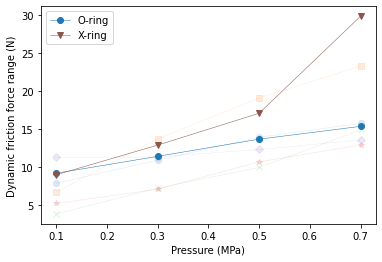

In [7]:
plt.plot(frictie_range.Pressure,frictie_range.O_ring,marker='o',color='tab:blue',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.NAPN,marker='s',color='tab:orange',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.NAP310,marker='x',color='tab:green',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.PK,marker='*',color='tab:red',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.KDN,marker='D',color='tab:purple',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.O_ring257,marker='o',color='tab:blue',label='O-ring',linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.X_ring257,marker='v',color='tab:brown',label='X-ring',linewidth=0.5)
plt.xlabel('Pressure (MPa)')
plt.ylabel('Dynamic friction force range (N)')

plt.legend()
plt.savefig('./figures/test_3_results_frictionforcerange_257mm.pdf',bbox_inches = 'tight')



####  Amplitude friction plot different shapes

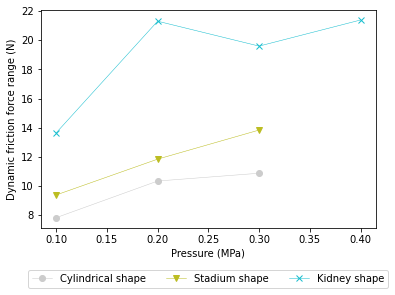

In [95]:
fr = {'Pressure': [.1,.2,.3],
     'Circle': [friction_force['Circle'][1]['FrictionRange'],friction_force['Circle'][2]['FrictionRange'],friction_force['Circle'][3]['FrictionRange']],
     'Stadium': [friction_force['Stadium'][1]['FrictionRange'],friction_force['Stadium'][2]['FrictionRange'],friction_force['Stadium'][3]['FrictionRange']],
    }

frictie_range_shape = pd.DataFrame(data=fr)

fr = {'Pressure': [.1,.2,.3,.4],
     'Kidney': [friction_force['Kidney'][1]['FrictionRange'],friction_force['Kidney'][2]['FrictionRange'],friction_force['Kidney'][3]['FrictionRange'],friction_force['Kidney'][4]['FrictionRange']],
    }

frictie_range_shape_kd = pd.DataFrame(data=fr)

plt.plot(frictie_range_shape.Pressure,frictie_range_shape.Circle,marker='o',color='0.8',label='Cylindrical shape',linewidth=0.5)
plt.plot(frictie_range_shape.Pressure,frictie_range_shape.Stadium,marker='v',color='tab:olive', label='Stadium shape',linewidth=0.5)
plt.plot(frictie_range_shape_kd.Pressure,frictie_range_shape_kd.Kidney,marker='x',color='tab:cyan', label='Kidney shape',linewidth=0.5)

plt.xlabel('Pressure (MPa)')
plt.ylabel('Dynamic friction force range (N)')

plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.3),ncol=3)
plt.savefig('./figures/test_3_results_frictionforcerange_shape.pdf',bbox_inches = 'tight')



####  Amplitude friction plot different shapes with lower clearance

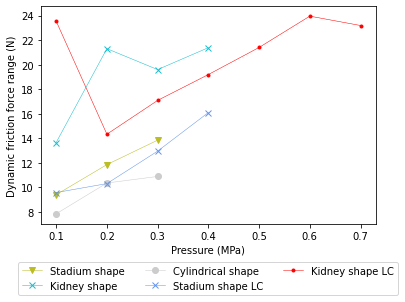

In [96]:

fr = {'Pressure': [.1,.2,.3,.4],
     'Stadium_lc': [friction_force['Stadium_lc'][1]['FrictionRange'],friction_force['Stadium_lc'][2]['FrictionRange'],friction_force['Stadium_lc'][3]['FrictionRange'],friction_force['Stadium_lc'][4]['FrictionRange']],
    }

frictie_range_shape_st = pd.DataFrame(data=fr)

fr = {'Pressure': [.1,.2,.3,.4,.5,.6,.7],
     'Kidney_lc': [friction_force['Kidney_lc'][1]['FrictionRange'],friction_force['Kidney_lc'][2]['FrictionRange'],friction_force['Kidney_lc'][3]['FrictionRange'],friction_force['Kidney_lc'][4]['FrictionRange'],friction_force['Kidney_lc'][5]['FrictionRange'],friction_force['Kidney_lc'][6]['FrictionRange'],friction_force['Kidney_lc'][7]['FrictionRange']]
    }

frictie_range_shape_kdlc = pd.DataFrame(data=fr)

plt.plot(frictie_range_shape.Pressure,frictie_range_shape.Stadium,marker='v',color='tab:olive', label='Stadium shape',linewidth=0.5)
plt.plot(frictie_range_shape_kd.Pressure,frictie_range_shape_kd.Kidney,marker='x',color='tab:cyan', label='Kidney shape',linewidth=0.5)
plt.plot(frictie_range_shape.Pressure,frictie_range_shape.Circle,marker='o',color='0.8',label='Cylindrical shape',linewidth=0.5)

plt.plot(frictie_range_shape_st.Pressure,frictie_range_shape_st.Stadium_lc,marker='x',color='cornflowerblue', label='Stadium shape LC',linewidth=0.5)
plt.plot(frictie_range_shape_kdlc.Pressure,frictie_range_shape_kdlc.Kidney_lc,marker='.',color='red', label='Kidney shape LC',linewidth=0.5)

plt.xlabel('Pressure (MPa)')
plt.ylabel('Dynamic friction force range (N)')

plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.35),ncol=3)
plt.savefig('./figures/test_3_results_frictionforcerange_shape_lc.pdf',bbox_inches = 'tight')



# Repeatablilty

### Reconnected

In [10]:
friction_reconnected = {}

for test in range(1,4):
    friction_reconnected[test] = {}
    for bar in [1,3,5,7]:
        test_df = pd.read_csv(f'./data/repeatability/reconnected/friction/{test}_O-ring257_{bar}bar.csv',delimiter='\s+',header=None,names=(['Time','A','B','C','Laser(mm)','Pressure(bar)','Force(N)']))
        test_df.drop(columns=['A','B','C'],index=test_df.index[range(drop_amount)],axis=1,inplace=True)

        friction_reconnected[test][bar] = {}
        friction_reconnected[test][bar]['Time'] = test_df['Time']/1000
        friction_reconnected[test][bar]['Laser(mm)'] = test_df['Laser(mm)']
        friction_reconnected[test][bar]['Pressure(bar)'] = test_df['Pressure(bar)']/10
        friction_reconnected[test][bar]['Force(N)'] = test_df['Force(N)']

        Fp = test_df['Pressure(bar)'] * 10**5 * large_area
       
        FF = test_df['Force(N)'] - Fp
        friction_reconnected[test][bar]['FrictionForce'] = FF      
        friction_reconnected[test][bar]['FrictionFrom'] = FF[FF>0].mean()
        friction_reconnected[test][bar]['FrictionTo'] = FF[FF<0].mean()
        # Defining the friction force range
        friction_reconnected[test][bar]['FrictionRange'] = friction_reconnected[test][bar]['FrictionFrom'] - friction_reconnected[test][bar]['FrictionTo']


In [11]:
fr = {'Pressure': [.1,.3,.5,.7],
     1: [friction_reconnected[1][1]['FrictionRange'],friction_reconnected[1][3]['FrictionRange'],friction_reconnected[1][5]['FrictionRange'],friction_reconnected[1][7]['FrictionRange']],
     2: [friction_reconnected[2][1]['FrictionRange'],friction_reconnected[2][3]['FrictionRange'],friction_reconnected[2][5]['FrictionRange'],friction_reconnected[2][7]['FrictionRange']],
     3: [friction_reconnected[3][1]['FrictionRange'],friction_reconnected[3][3]['FrictionRange'],friction_reconnected[3][5]['FrictionRange'],friction_reconnected[3][7]['FrictionRange']],
    }
friction_reconnected = pd.DataFrame(data=fr)

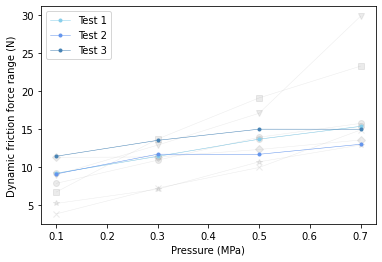

In [12]:
plt.plot(frictie_range.Pressure,frictie_range.O_ring,marker='o',color='tab:grey',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.NAPN,marker='s',color='tab:grey',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.NAP310,marker='x',color='tab:grey',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.PK,marker='*',color='tab:grey',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.KDN,marker='D',color='tab:grey',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.O_ring257,marker='o',color='tab:grey',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.X_ring257,marker='v',color='tab:grey',alpha=0.15,linewidth=0.5)

plt.plot(friction_reconnected.Pressure,friction_reconnected[1],marker='.',color='skyblue',label='Test 1',linewidth=0.5)
plt.plot(friction_reconnected.Pressure,friction_reconnected[2],marker='.',color='cornflowerblue',label='Test 2',linewidth=0.5)
plt.plot(friction_reconnected.Pressure,friction_reconnected[3],marker='.',color='steelblue',label='Test 3',linewidth=0.5)
plt.xlabel('Pressure (MPa)')
plt.ylabel('Dynamic friction force range (N)')

plt.legend()
plt.savefig('./figures/reconnected_friction_force.pdf',bbox_inches = 'tight')


### Rerun

In [13]:
friction_rerun = {}

for test in range(1,4):
    friction_rerun[test] = {}
    for bar in [1,3,5,7]:
        test_df = pd.read_csv(f'./data/repeatability/rerun/friction/{test}_O-ring257_{bar}bar.csv',delimiter='\s+',header=None,names=(['Time','A','B','C','Laser(mm)','Pressure(bar)','Force(N)']))
        test_df.drop(columns=['A','B','C'],index=test_df.index[range(drop_amount)],axis=1,inplace=True)

        friction_rerun[test][bar] = {}
        friction_rerun[test][bar]['Time'] = test_df['Time']/1000
        friction_rerun[test][bar]['Laser(mm)'] = test_df['Laser(mm)']
        friction_rerun[test][bar]['Pressure(bar)'] = test_df['Pressure(bar)']/10
        friction_rerun[test][bar]['Force(N)'] = test_df['Force(N)']

        Fp = test_df['Pressure(bar)'] * 10**5 * large_area
       
        FF = test_df['Force(N)'] - Fp
        friction_rerun[test][bar]['FrictionForce'] = FF      
        friction_rerun[test][bar]['FrictionFrom'] = FF[FF>0].mean()
        friction_rerun[test][bar]['FrictionTo'] = FF[FF<0].mean()
        # Defining the friction force range
        friction_rerun[test][bar]['FrictionRange'] = friction_rerun[test][bar]['FrictionFrom'] - friction_rerun[test][bar]['FrictionTo']


In [14]:
fr = {'Pressure': [.1,.3,.5,.7],
     1: [friction_rerun[1][1]['FrictionRange'],friction_rerun[1][3]['FrictionRange'],friction_rerun[1][5]['FrictionRange'],friction_rerun[1][7]['FrictionRange']],
     2: [friction_rerun[2][1]['FrictionRange'],friction_rerun[2][3]['FrictionRange'],friction_rerun[2][5]['FrictionRange'],friction_rerun[2][7]['FrictionRange']],
     3: [friction_rerun[3][1]['FrictionRange'],friction_rerun[3][3]['FrictionRange'],friction_rerun[3][5]['FrictionRange'],friction_rerun[3][7]['FrictionRange']],
    }
friction_rerun = pd.DataFrame(data=fr)

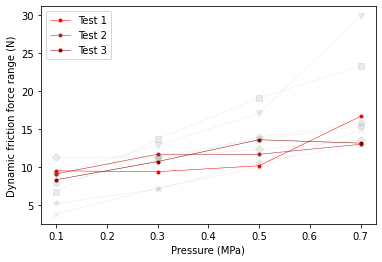

In [15]:
plt.plot(frictie_range.Pressure,frictie_range.O_ring,marker='o',color='tab:grey',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.NAPN,marker='s',color='tab:grey',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.NAP310,marker='x',color='tab:grey',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.PK,marker='*',color='tab:grey',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.KDN,marker='D',color='tab:grey',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.O_ring257,marker='o',color='tab:grey',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.X_ring257,marker='v',color='tab:grey',alpha=0.15,linewidth=0.5)

plt.plot(friction_rerun.Pressure,friction_rerun[1],marker='.',color='red',label='Test 1',linewidth=0.5)
plt.plot(friction_rerun.Pressure,friction_rerun[2],marker='.',color='firebrick',label='Test 2',linewidth=0.5)
plt.plot(friction_rerun.Pressure,friction_rerun[3],marker='.',color='darkred',label='Test 3',linewidth=0.5)
plt.xlabel('Pressure (MPa)')
plt.ylabel('Dynamic friction force range (N)')

plt.legend()
plt.savefig('./figures/rerun_friction_force.pdf',bbox_inches = 'tight')
